# Importing Libraries

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [256]:
df=pd.read_excel('C:/Users/aksin52/Documents/Machine Learning Express/Introduction to Machine Learning/Marketing Analytics Specialization/Part 11 - Marketing Analytics Projects for Retail/Project 1 - Response Modeling for Supermarket/Data Folder/marketing_campaign.xlsx')

In [257]:
df.shape

(2240, 29)

In [258]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Setting Display options to ensure feature name visibility

In [259]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [260]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [261]:
df=df.drop(['ID'],axis=1)

# Defining Target and Independent Features

In [262]:
type(df['Response'])

pandas.core.series.Series

In [263]:
Y=df[['Response']]
X=df.drop(['Response'],axis=1)

# Get the Response Rate

In [264]:
Y.mean()

Response    0.149107
dtype: float64

# Build Derived Features - Customer Age and Tenure

In [265]:
import datetime
reference_date=datetime.datetime(2021,1,1)
print(reference_date)

2021-01-01 00:00:00


In [266]:
X['Year_Birth']=pd.to_datetime(df['Year_Birth'], format='%Y')
X['Age'] = (reference_date- X['Year_Birth']).astype('timedelta64[Y]')

X['Dt_Customer']=pd.to_datetime(X['Dt_Customer'])
X['Cust_Tenure'] = (reference_date- X['Dt_Customer']).astype('timedelta64[Y]')

X=X.drop(['Year_Birth','Dt_Customer'],axis=1)

In [267]:
X[['Age','Cust_Tenure']].head()

,Age,Cust_Tenure
0,64.0,8.0
1,67.0,6.0
2,56.0,7.0
3,37.0,6.0
4,40.0,6.0


# Split features into Numerical and Categorical

In [268]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [269]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [270]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Income,1974
Kidhome,3
Teenhome,3
Recency,100
MntWines,776


In [271]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Kidhome                  int64
Teenhome                 int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Cust_Tenure            float64
dtype: object

In [272]:
def data_type_converter(x):
    x=x.astype('object')
    return(x)
cat=cat.apply(lambda x : data_type_converter(x))
cat.dtypes

Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [273]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [274]:
char=pd.concat([char,cat],axis=1,join="inner")

In [275]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (2240, 9)
The shape of categorical datafrme : (2240, 18)


# Outlier Analysis of Numerical Features

In [276]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,52.193750
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,11.981263
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
1%,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,29.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,33.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,37.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,44.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,51.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,62.000000


# Capping and Flooring of outliers

In [277]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [278]:
num=num.apply(lambda x : outlier_cap(x))

In [279]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51770.277076,49.101786,302.909821,26.158482,165.075446,37.351366,26.873688,43.770089,52.132143
std,20728.704775,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,11.666094
min,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,29.000000
1%,7646.520000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,29.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,33.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,37.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,44.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,51.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,62.000000


# Missing Value Handling - Numerical Features 

In [280]:
num.isnull().mean()

Income              0.010714
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
MntGoldProds        0.000000
Age                 0.000000
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [281]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [282]:
num_1.isnull().mean()

Income              0.0
Recency             0.0
MntWines            0.0
MntFruits           0.0
MntMeatProducts     0.0
MntFishProducts     0.0
MntSweetProducts    0.0
MntGoldProds        0.0
Age                 0.0
dtype: float64

# Missing Value Handling - Categorical Features (Remove >25% Missing Rows)

In [283]:
char.isnull().mean()

Education              0.0
Marital_Status         0.0
Kidhome                0.0
Teenhome               0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Cust_Tenure            0.0
dtype: float64

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [284]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [285]:
num_2.iloc[0]

Income              58138.0
Recency                58.0
MntWines              635.0
MntFruits              88.0
MntMeatProducts       546.0
MntFishProducts       172.0
MntSweetProducts       88.0
MntGoldProds           88.0
Age                    64.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [286]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.head()

,Income_Rank,Recency_Rank,MntWines_Rank,MntFruits_Rank,MntMeatProducts_Rank,MntFishProducts_Rank,MntSweetProducts_Rank,MntGoldProds_Rank,Age_Rank
0,5.0,5.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0
1,4.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
2,7.0,2.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0
3,1.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
4,6.0,9.0,4.0,6.0,6.0,6.0,6.0,3.0,1.0


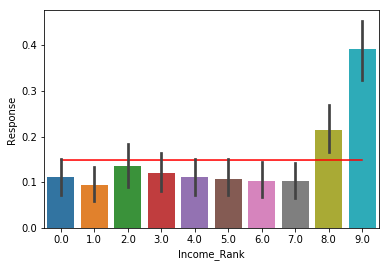

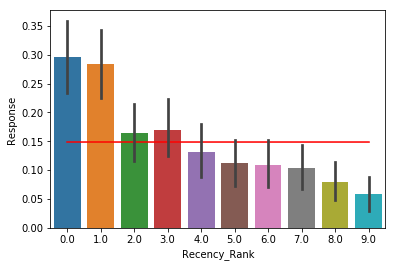

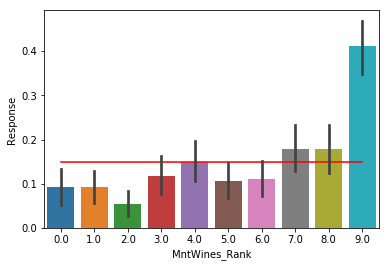

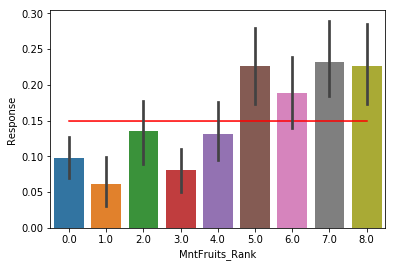

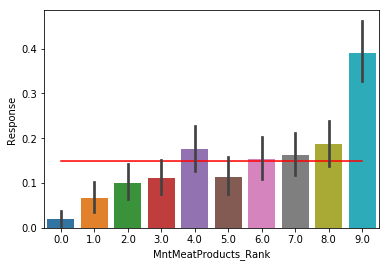

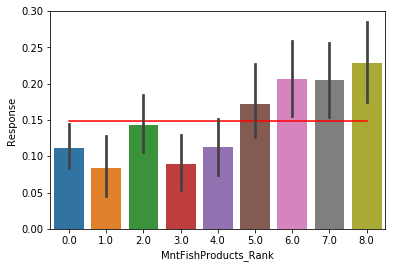

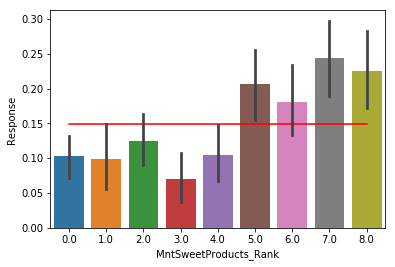

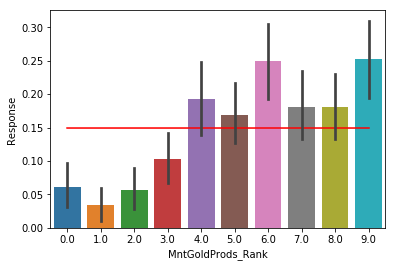

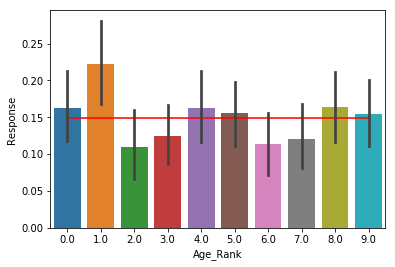

In [287]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Response'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Response",data=X_bin_combined, estimator=mean )
plt.show()

In [288]:
num_droplist=['Age']
num_2=num_2.drop(num_droplist,axis=1)
num_2.shape

(2240, 8)

# Part 3 - Select K Best

In [289]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=6)
selector.fit_transform(num_2, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [290]:
select_features_df_num.iloc[0]

Income             58138.0
MntWines             635.0
MntFruits             88.0
MntMeatProducts      546.0
MntFishProducts      172.0
MntGoldProds          88.0
Name: 0, dtype: float64

# Feature Selection - Categorical Features 

In [291]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [292]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [293]:
char_unique_levels

,0
Education,5
Marital_Status,8
Kidhome,3
Teenhome,3
NumDealsPurchases,15
NumWebPurchases,15
NumCatalogPurchases,14
NumStorePurchases,14
NumWebVisitsMonth,16
AcceptedCmp3,2


In [294]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

# Part 1 - Bi Variate Analysis

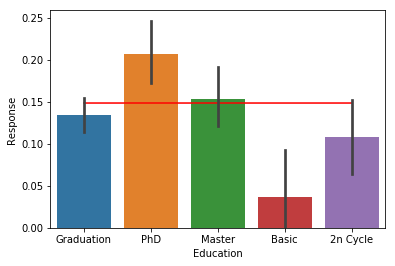

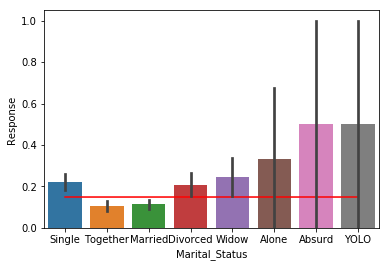

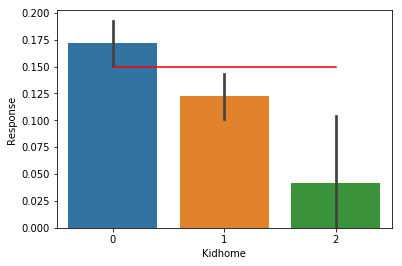

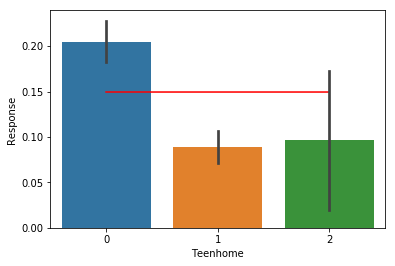

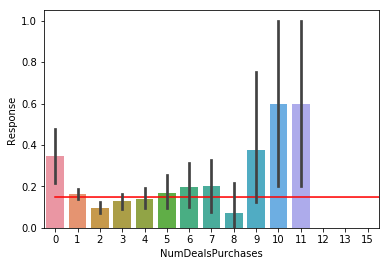

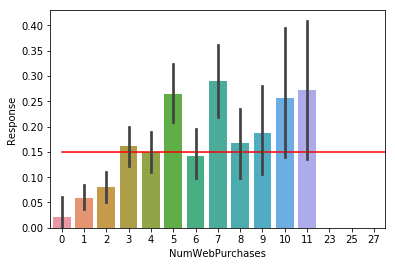

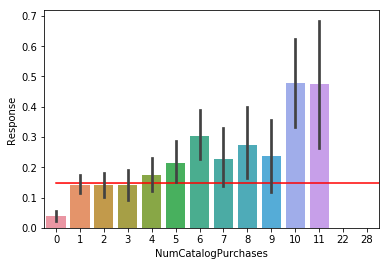

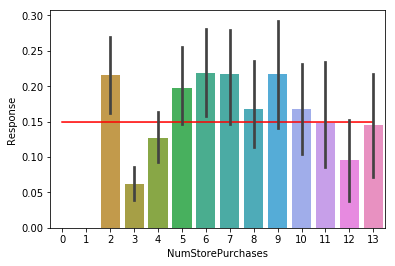

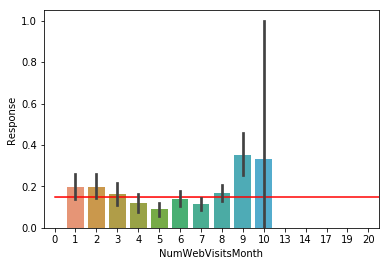

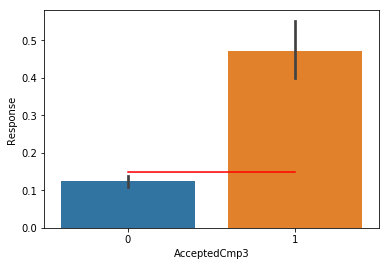

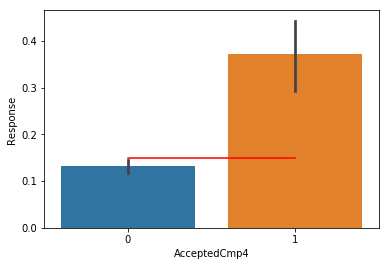

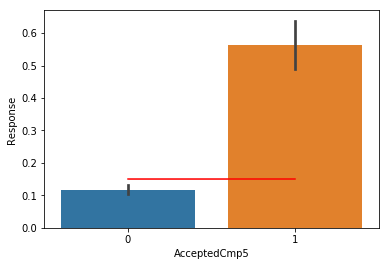

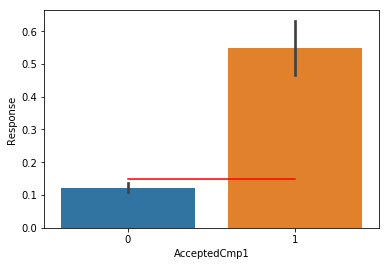

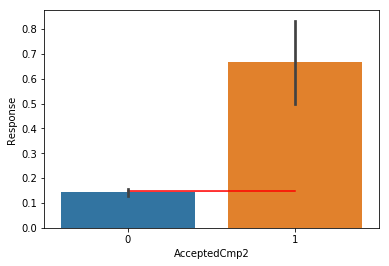

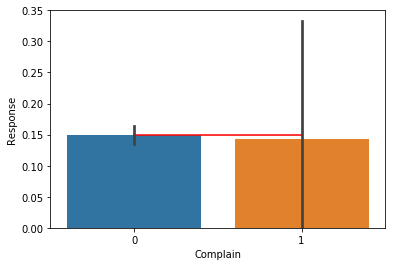

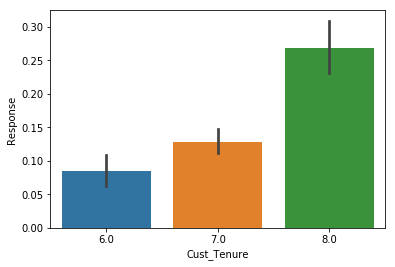

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Response'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Response",data=X_char_merged, estimator=mean )
plt.show()

In [ ]:
char.dtypes

In [296]:
char_droplist=['Education','NumStorePurchases','Complain']
char=char.drop(char_droplist,axis=1)
char.shape

(2240, 13)

In [297]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(2240, 74)

# Part 2 - Select K Best

In [298]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=70)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [299]:
select_features_df_char.dtypes

Marital_Status_Alone       uint8
Marital_Status_Divorced    uint8
Marital_Status_Married     uint8
Marital_Status_Single      uint8
Marital_Status_Together    uint8
Marital_Status_Widow       uint8
Marital_Status_YOLO        uint8
Kidhome_1                  uint8
Kidhome_2                  uint8
Teenhome_1                 uint8
Teenhome_2                 uint8
NumDealsPurchases_1        uint8
NumDealsPurchases_2        uint8
NumDealsPurchases_3        uint8
NumDealsPurchases_4        uint8
NumDealsPurchases_5        uint8
NumDealsPurchases_6        uint8
NumDealsPurchases_7        uint8
NumDealsPurchases_8        uint8
NumDealsPurchases_9        uint8
NumDealsPurchases_10       uint8
NumDealsPurchases_11       uint8
NumDealsPurchases_12       uint8
NumDealsPurchases_13       uint8
NumDealsPurchases_15       uint8
NumWebPurchases_1          uint8
NumWebPurchases_2          uint8
NumWebPurchases_3          uint8
NumWebPurchases_5          uint8
NumWebPurchases_7          uint8
          

# Creating the Master Feature Set for Model Development

In [300]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

# Dimensionality Reduction through Variable Clustering

In [301]:
from varclushi import VarClusHi
vc = VarClusHi(X_all,maxeigval2=1,maxclus=None)
vc.varclus()

In [302]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,8,4.016371,0.961196,0.502046
1,1,4,1.635838,0.979786,0.408960
2,2,4,1.832339,0.887457,0.458085
3,3,3,1.574876,0.993826,0.524959
4,4,2,1.533925,0.466075,0.766963
5,5,2,1.200920,0.799080,0.600460
6,6,3,1.415532,0.998584,0.471844
7,7,2,1.030270,0.969730,0.515135
8,8,3,1.201906,0.958295,0.400635
9,9,4,1.065564,0.993028,0.266391


In [303]:
check=vc.rsquare
check

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Kidhome_1,0.438819,0.076622,6.077485e-01
1,0,Income,0.736300,0.168487,3.171325e-01
2,0,MntWines,0.593854,0.274441,5.597690e-01
3,0,MntFruits,0.540704,0.079952,4.992088e-01
4,0,MntMeatProducts,0.691833,0.156511,3.653474e-01
5,0,MntFishProducts,0.574333,0.108486,4.774653e-01
6,0,MntGoldProds,0.375861,0.043546,6.525553e-01
7,0,NumCatalogPurchases_8,0.064667,0.009249,9.440650e-01
8,1,Teenhome_1,0.575102,0.038811,4.420545e-01
9,1,NumDealsPurchases_1,0.626227,0.044876,3.913350e-01


In [304]:
filter=check[check['RS_Ratio']<=0.5]
filter.shape

(45, 5)

In [305]:
final_features=filter['Variable']
X_all=X_all[final_features]
X_all.shape

(2240, 45)

# Train Test Split

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [307]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (1568, 45)
Shape of Testing Data (672, 45)
Response Rate in Training Data Response    0.149872
dtype: float64
Response Rate in Testing Data Response    0.147321
dtype: float64


# Building Logistic Regression Model

In [308]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=20)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=20)

# Building Decision Tree Model

In [309]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

# Grid Search for Model Optimization

In [310]:
# Min_Samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [75,100,125,150] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 75}


In [311]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=75, random_state=20)

# Building Random Forest Model

In [312]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=75, random_state=20)

# Building Gradient Boosting Model

In [313]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=5,min_samples_split=75)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=75,
                           random_state=20)

# Model Evaluation

In [314]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [315]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [316]:
print("Accuracy from Logistic Regression Model :",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision from Logistic Regression Model :",metrics.precision_score(y_test,y_pred_logreg))
print("Recall from Logistic Regression Model :",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score from Logistic Regression Model :",metrics.f1_score(y_test,y_pred_logreg))
print("Area under ROC Curve from Logistic Regression Model :",metrics.roc_auc_score(y_test,y_pred_logreg))
print("Gini from the Logistic Regression Model :",2*metrics.roc_auc_score(y_test,y_pred_logreg)-1)

Accuracy from Logistic Regression Model : 0.8511904761904762
Precision from Logistic Regression Model : 0.45454545454545453
Recall from Logistic Regression Model : 0.050505050505050504
f1_score from Logistic Regression Model : 0.0909090909090909
Area under ROC Curve from Logistic Regression Model : 0.5200169231582844
Gini from the Logistic Regression Model : 0.04003384631656881


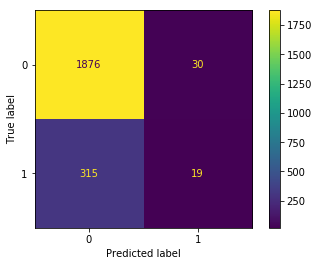

In [317]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [318]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))
print("Gini from the Decision Tree Model :",2*metrics.roc_auc_score(y_test,y_pred_tree)-1)

Accuracy from Decision Tree Model : 0.8556547619047619
Precision from Decision Tree Model : 0.5555555555555556
Recall from Decision Tree Model : 0.10101010101010101
f1_score from Decision Tree Model : 0.17094017094017094
Area under ROC Curve from Decision Tree Model : 0.5435242477127293
Gini from the Decision Tree Model : 0.08704849542545867


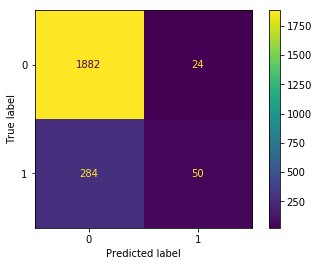

In [319]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [320]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))
print("Gini from the Random Forest Model :",2*metrics.roc_auc_score(y_test,y_pred_rf)-1)

Accuracy from Random Forest Model : 0.8526785714285714
Precision from Random Forest Model : 0.0
Recall from Random Forest Model : 0.0
f1_score from Random Forest Model : 0.0
Area under ROC Curve from Random Forest Model : 0.5
Gini from the Random Forest Model : 0.0


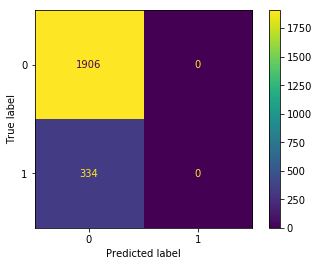

In [321]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [322]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_gbm))
print("Gini from the GBM Model :",2*metrics.roc_auc_score(y_test,y_pred_gbm)-1)

Accuracy from GBM Model : 0.8630952380952381
Precision from GBM Model : 0.5813953488372093
Recall from GBM Model : 0.25252525252525254
f1_score from GBM Model : 0.35211267605633806
Area under ROC Curve from GBM Model : 0.6105558199799037
Gini from the GBM Model : 0.22111163995980743


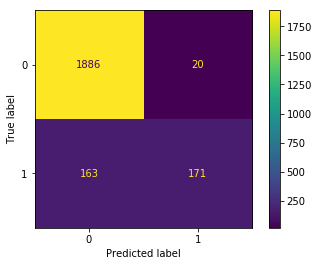

In [323]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

# Extracting Feature Importance from the best model

In [324]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(45, 1)

# Extracting the Top 10 Important Model Features

In [325]:
feature_importances.iloc[0:10]

,importance
Income,0.239695
MntMeatProducts,0.234649
AcceptedCmp3_1,0.107848
MntFishProducts,0.076480
MntFruits,0.066708
Cust_Tenure_8.0,0.053316
NumCatalogPurchases_10,0.026466
Marital_Status_Together,0.022226
Marital_Status_Single,0.016421
Marital_Status_Married,0.015557


# Plotting the top 10 feature importances in a Horizontal Bar Plot

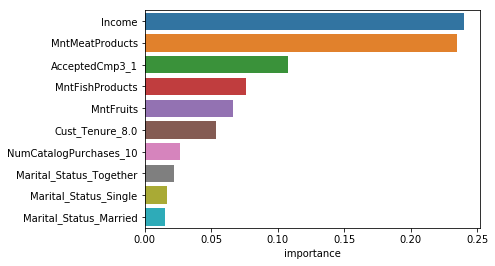

In [326]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

# Probability Decile Analysis and Gains Chart / Lorenz Curve

# Step 1 : Getting the Model Probabilities

In [327]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)

# Step 2 : Create Deciles based on the Model Probabilities

In [328]:
df['P_Rank_gbm']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
df[['pred_prob','P_Rank_gbm']].head()

,pred_prob,P_Rank_gbm
0,0.846883,10
1,0.012458,1
2,0.073411,6
3,0.027514,3
4,0.035007,4


# Step 3 : Summarize the data at Decile Level for Analysis

In [329]:
rank_df=df.groupby('P_Rank_gbm')['Response'].agg(['count','mean']).sort_values(by='P_Rank_gbm',ascending=False)
rank_df.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df

,count,Actual_event_rate
P_Rank_gbm,,
10,224,0.870536
9,224,0.370536
8,224,0.107143
7,224,0.040179
6,224,0.058036
5,224,0.017857
4,224,0.004464
3,224,0.008929
2,224,0.004464


# Step 4 - Event Capture Analysis across Probability Deciles

In [330]:
rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
rank_df['cum_events']=rank_df['N_events'].cumsum()
rank_df['event_cap']=rank_df['N_events']/max(rank_df['N_events'].cumsum())
rank_df['cum_event_cap']=rank_df['event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_gbm,,,,,,
10,224,0.870536,195.0,195.0,0.583832,0.583832
9,224,0.370536,83.0,278.0,0.248503,0.832335
8,224,0.107143,24.0,302.0,0.071856,0.904192
7,224,0.040179,9.0,311.0,0.026946,0.931138
6,224,0.058036,13.0,324.0,0.038922,0.970060
5,224,0.017857,4.0,328.0,0.011976,0.982036
4,224,0.004464,1.0,329.0,0.002994,0.985030
3,224,0.008929,2.0,331.0,0.005988,0.991018
2,224,0.004464,1.0,332.0,0.002994,0.994012


# Step 5 - Non Event Capture Analysis across Probability Deciles

In [331]:
rank_df['N_non_events']=rank_df['count']-rank_df['N_events']
rank_df['cum_non_events']=rank_df['N_non_events'].cumsum()
rank_df['non_event_cap']=rank_df['N_non_events']/max(rank_df['N_non_events'].cumsum())
rank_df['cum_non_event_cap']=rank_df['non_event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
P_Rank_gbm,,,,,,,,,,
10,224,0.870536,195.0,195.0,0.583832,0.583832,29.0,29.0,0.015215,0.015215
9,224,0.370536,83.0,278.0,0.248503,0.832335,141.0,170.0,0.073977,0.089192
8,224,0.107143,24.0,302.0,0.071856,0.904192,200.0,370.0,0.104932,0.194124
7,224,0.040179,9.0,311.0,0.026946,0.931138,215.0,585.0,0.112802,0.306925
6,224,0.058036,13.0,324.0,0.038922,0.970060,211.0,796.0,0.110703,0.417629
5,224,0.017857,4.0,328.0,0.011976,0.982036,220.0,1016.0,0.115425,0.533054
4,224,0.004464,1.0,329.0,0.002994,0.985030,223.0,1239.0,0.116999,0.650052
3,224,0.008929,2.0,331.0,0.005988,0.991018,222.0,1461.0,0.116474,0.766527
2,224,0.004464,1.0,332.0,0.002994,0.994012,223.0,1684.0,0.116999,0.883526


# Step 6 - Compute KS Statistic and Lift over Baseline Event Rate

In [332]:
rank_df['KS']=round((rank_df['cum_event_cap']-rank_df['cum_non_event_cap']),4)
rank_df['Baseline_Event_Rate']=(max(rank_df['cum_events'])/max(rank_df['count'].cumsum()))
rank_df['Lift_over_Avg']=rank_df['Actual_event_rate']/rank_df['Baseline_Event_Rate']
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg
P_Rank_gbm,,,,,,,,,,,,,
10,224,0.870536,195.0,195.0,0.583832,0.583832,29.0,29.0,0.015215,0.015215,0.5686,0.149107,5.838323
9,224,0.370536,83.0,278.0,0.248503,0.832335,141.0,170.0,0.073977,0.089192,0.7431,0.149107,2.485030
8,224,0.107143,24.0,302.0,0.071856,0.904192,200.0,370.0,0.104932,0.194124,0.7101,0.149107,0.718563
7,224,0.040179,9.0,311.0,0.026946,0.931138,215.0,585.0,0.112802,0.306925,0.6242,0.149107,0.269461
6,224,0.058036,13.0,324.0,0.038922,0.970060,211.0,796.0,0.110703,0.417629,0.5524,0.149107,0.389222
5,224,0.017857,4.0,328.0,0.011976,0.982036,220.0,1016.0,0.115425,0.533054,0.4490,0.149107,0.119760
4,224,0.004464,1.0,329.0,0.002994,0.985030,223.0,1239.0,0.116999,0.650052,0.3350,0.149107,0.029940
3,224,0.008929,2.0,331.0,0.005988,0.991018,222.0,1461.0,0.116474,0.766527,0.2245,0.149107,0.059880
2,224,0.004464,1.0,332.0,0.002994,0.994012,223.0,1684.0,0.116999,0.883526,0.1105,0.149107,0.029940


# Step 7 - Create Deciles (1-10) column to indicate the Decile number

In [333]:
rank_df=rank_df.reset_index()
rank_df['Decile']=rank_df.index+1
rank_df

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg,Decile
0,10,224,0.870536,195.0,195.0,0.583832,0.583832,29.0,29.0,0.015215,0.015215,0.5686,0.149107,5.838323,1
1,9,224,0.370536,83.0,278.0,0.248503,0.832335,141.0,170.0,0.073977,0.089192,0.7431,0.149107,2.485030,2
2,8,224,0.107143,24.0,302.0,0.071856,0.904192,200.0,370.0,0.104932,0.194124,0.7101,0.149107,0.718563,3
3,7,224,0.040179,9.0,311.0,0.026946,0.931138,215.0,585.0,0.112802,0.306925,0.6242,0.149107,0.269461,4
4,6,224,0.058036,13.0,324.0,0.038922,0.970060,211.0,796.0,0.110703,0.417629,0.5524,0.149107,0.389222,5
5,5,224,0.017857,4.0,328.0,0.011976,0.982036,220.0,1016.0,0.115425,0.533054,0.4490,0.149107,0.119760,6
6,4,224,0.004464,1.0,329.0,0.002994,0.985030,223.0,1239.0,0.116999,0.650052,0.3350,0.149107,0.029940,7
7,3,224,0.008929,2.0,331.0,0.005988,0.991018,222.0,1461.0,0.116474,0.766527,0.2245,0.149107,0.059880,8
8,2,224,0.004464,1.0,332.0,0.002994,0.994012,223.0,1684.0,0.116999,0.883526,0.1105,0.149107,0.029940,9
9,1,224,0.008929,2.0,334.0,0.005988,1.000000,222.0,1906.0,0.116474,1.000000,0.0000,0.149107,0.059880,10


# Visualizing the performance of Model Probabilties across Deciles

# Step 8 - Create the Rank Ordering Chart

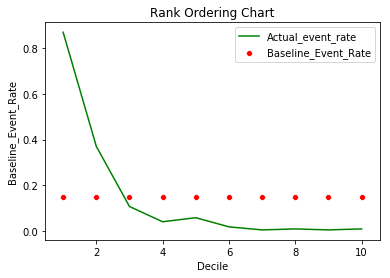

In [334]:
ax = sns.lineplot(x="Decile", y="Actual_event_rate", data=rank_df,color='green').set_title('Rank Ordering Chart')
ax = sns.scatterplot( x="Decile", y="Baseline_Event_Rate", data=rank_df,color='red')
ax.legend(['Actual_event_rate', 'Baseline_Event_Rate'])

# Step 9 - Create the Lift Chart

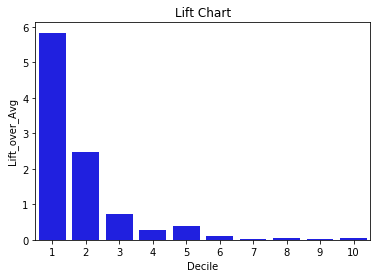

In [335]:
ax = sns.barplot( x="Decile", y="Lift_over_Avg", data=rank_df,color='blue').set_title('Lift Chart')

# Step 10 - Create the Gains Chart / Lorenz Curve

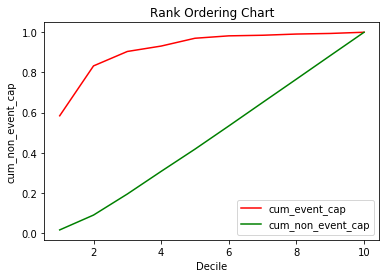

In [336]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=rank_df,color='red').set_title('Rank Ordering Chart')
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=rank_df,color='green')
ax.legend(['cum_event_cap', 'cum_non_event_cap'])

# Is our Model able to Maximise Event/Non-Event Discrimination by the Top 3 deciles?

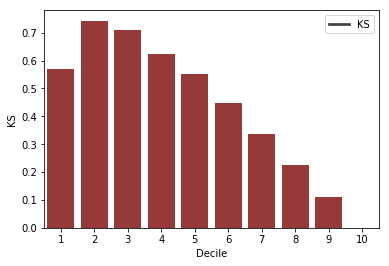

In [337]:
ax = sns.barplot( x="Decile", y="KS", data=rank_df,color='brown')
ax.legend(['KS'])

# Utlize APT framework to build a Machine Learning Driven Strategy

# A - Audience (Who do we target?)

In [338]:
df['Predicted_Resp_Rank']=np.where(df['P_Rank_gbm']>=9,"Top 2","Bottom 8")
df['Predicted_Resp_Rank'].value_counts()

Bottom 8    1792
Top 2        448
Name: Predicted_Resp_Rank, dtype: int64

In [339]:
df_top2=df.loc[df['Predicted_Resp_Rank']=="Top 2",:]
df_top2.shape

(448, 31)

# P - Prioritization (Based on Business Value and Customer Engagement)

In [340]:
df_top2['spend_cnt']=np.count_nonzero(df_top2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],axis=1)
df_top2['spend_cnt'].describe()

count    448.000000
mean       5.569196
std        0.824479
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: spend_cnt, dtype: float64

In [341]:
df_top2['Engagement']=np.where(df_top2['spend_cnt']<df_top2['spend_cnt'].quantile(0.75),"Low","High")
df_top2['Engagement'].value_counts()

High    326
Low     122
Name: Engagement, dtype: int64

In [342]:
df_top2['Total_Spend']=df_top2['MntWines']+df_top2['MntFruits']+df_top2['MntMeatProducts']+df_top2['MntFishProducts']+df_top2['MntSweetProducts']+df_top2['MntGoldProds']
df_top2['Total_Spend'].describe()

count     448.000000
mean      970.290179
std       710.391813
min        18.000000
25%       236.000000
50%      1026.500000
75%      1587.250000
max      2525.000000
Name: Total_Spend, dtype: float64

In [343]:
df_top2['spend_level']=np.where(df_top2['Total_Spend']<df_top2['Total_Spend'].quantile(0.75),"Low Spend","High Spend")
df_top2['spend_level'].value_counts()

Low Spend     336
High Spend    112
Name: spend_level, dtype: int64

In [344]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='mean')

Engagement,High,Low
spend_level,,
High Spend,0.705263,0.823529
Low Spend,0.601732,0.552381


In [345]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='count')

Engagement,High,Low
spend_level,,
High Spend,95,17
Low Spend,231,105


In [346]:
df_priority_1=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='Low'),:]
df_priority_1.shape

(17, 35)

In [347]:
df_priority_2=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='High'),:]
df_priority_2.shape

(95, 35)

In [348]:
df_priority_3=df_top2.loc[(df_top2['spend_level']=='Low Spend') & (df_top2['Engagement']=='High'),:]
df_priority_3.shape

(231, 35)

In [349]:
df_priority_4=df_top2.loc[(df_top2['spend_level']=='Low Spend') & (df_top2['Engagement']=='Low'),:]
df_priority_4.shape

(105, 35)

# T - Treatment (Identify Service/Product Preferences of each Priority Segment)

In [350]:
spend_cat_priority1=df_priority_1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [351]:
spend_avg = spend_cat_priority1.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            1171.294118
MntMeatProducts      509.470588
MntGoldProds          70.235294
MntFruits             55.941176
MntFishProducts       40.823529
MntSweetProducts      19.705882
dtype: float64

In [352]:
spend_cat_priority2=df_priority_2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [353]:
spend_avg = spend_cat_priority2.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            889.684211
MntMeatProducts     672.673684
MntFishProducts     105.957895
MntGoldProds         78.894737
MntSweetProducts     75.010526
MntFruits            74.000000
dtype: float64

In [354]:
spend_cat_priority3=df_priority_3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [355]:
spend_avg = spend_cat_priority3.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            305.826840
MntMeatProducts     208.956710
MntGoldProds         59.476190
MntFishProducts      45.722944
MntSweetProducts     36.818182
MntFruits            36.038961
dtype: float64

In [356]:
spend_cat_priority4=df_priority_4[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [357]:
spend_avg = spend_cat_priority4.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            375.676190
MntMeatProducts     136.466667
MntGoldProds         46.171429
MntFishProducts      16.000000
MntFruits            12.009524
MntSweetProducts     11.352381
dtype: float64

# Project Report and Actionable Insights

# Objective of the Project
Leverage the spend behavior and past campaign responses to build a response model that can
be used to devise a strategy that enhances the response rates and improves profitability of marketing campaigns

# Baseline Event Rate
The Response Rate from the data is 14.9%

# Algorithms Used :
In this project we have used Logistic Regression, Decision Trees, Random Forests and Gradient Boosting Algorithms

# Final Model Algorithm
Among the models that we tried building the GBM Algorithm performed the best in terms of F1_Score, Area under ROC Curve
and overall Model Gini

Therefore we have kept GBM as the final model algorithm

# Grid Search CV parameters
Maximum Depth of Tree - 5

Minimum Sample Size for Nodes to be Split - 75 Observations

# Model Performance Measures
Accuracy - 0.86

Precision - 0.58

Recall - 0.25

F1 Score - 0.35

AUC - 0.61

Gini - 0.22        

# Model Probability Discrimination Measures
Steady Event Rate Rank Ordering (Yes/No) - Yes

Rank Ordering Reversals in Top 3 Deciles (Yes/No) - No

Model Lift over  baseline event rate in the Top Decile - 5.8

Cumulative Event Capture in the Top 3 Deciles - 90% 

Maximum KS Statistic Value - 0.74

Does KS Statistic Maximize within Top 3 Deciles (Yes/No) - Yes 


# Top 10 drivers from the Model

Income

MntMeatProducts

AcceptedCmp3_1

MntFishProducts

MntFruits

Cust_Tenure_8.0

NumCatalogPurchases_10

Marital_Status_Together

Marital_Status_Single

Marital_Status_Married



# APT Stratgey Framework using the Model
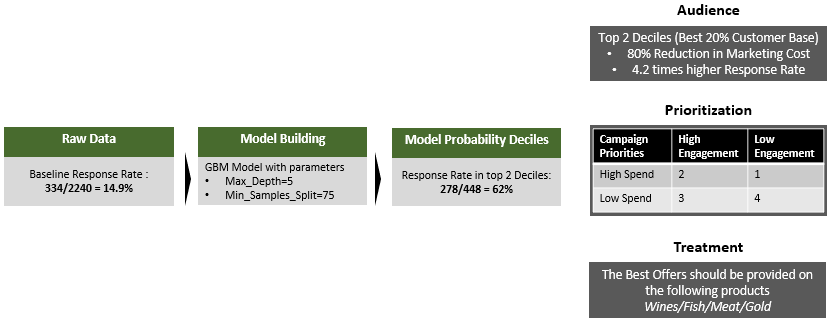